<a href="https://colab.research.google.com/github/erickvaldezsallagos/EDPII/blob/main/METODO_RICHARDSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **VALDEZ SALLAGOS ERICK**\
  
**METODO DE RICHARDSON & THOMAS PARA LA ECUACION DE CALOR**  

$u_t= u_{xx}$    
$0<x<1$,  $t>o$

con condiciones de frontera

$u(0,t)=0$\
$u(1,t)=0$

y condicion inicial:
$u(x,0)=sen(πx)$

Librerias necesarias

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation, PillowWriter

print("\n=== SIMULACIÓN: ECUACIÓN DE CALOR 1D ===\n")



=== SIMULACIÓN: ECUACIÓN DE CALOR 1D ===



Parametros del problema y discretizacion

In [15]:
# Parámetros del problema
n = 9        # número de puntos internos -> mallado espacial
j = 20       # pasos de tiempo
t_max = 0.6  # tiempo total

dx = 1/(n+1)
dt = t_max/j
r = dt/dx**2

print(f"Δx={dx:.4f}, Δt={dt:.4f}, r={r:.4f}")

Δx=0.1000, Δt=0.0300, r=3.0000


Ejercicio 2. Condicion inicial

In [16]:
def f(x):
    return np.sin(np.pi * x)

x_int = np.linspace(dx, 1-dx, n)
b = f(x_int)

Ejercicio 1. Matriz A

In [17]:
diag = (1 + 2*r)*np.ones(n)
sub = -r*np.ones(n-1)

A = (np.diag(diag) +
     np.diag(sub, 1) +
     np.diag(sub, -1))

Ejercicio 5. No es necesario resolver el sistema:

In [18]:
def thomas(a, b, c, d):
    """Algoritmo de Thomas para matriz tridiagonal."""
    n = len(d)
    c2 = np.zeros(n-1)
    d2 = np.zeros(n)
    x = np.zeros(n)

    c2[0] = c[0]/b[0]
    d2[0] = d[0]/b[0]

    for i in range(1, n-1):
        denom = b[i] - a[i-1]*c2[i-1]
        c2[i] = c[i]/denom
        d2[i] = (d[i] - a[i-1]*d2[i-1])/denom

    d2[n-1] = (d[n-1] - a[n-2]*d2[n-2])/(b[n-1] - a[n-2]*c2[n-2])

    x[n-1] = d2[n-1]
    for i in range(n-2, -1, -1):
        x[i] = d2[i] - c2[i]*x[i+1]

    return x

Metodo implicito (Richardson)

In [19]:
def richardson(A, b, j):
    a = np.diag(A, -1)
    diag = np.diag(A)
    c = np.diag(A, 1)

    U = np.zeros((j+1, n))
    U[0] = b

    for k in range(1, j+1):
        U[k] = thomas(a, diag, c, U[k-1])

    return U

# Calcular solución numérica
U_int = richardson(A, b, j)

# Reconstruir solución completa
x_full = np.linspace(0, 1, n+2)
U = np.zeros((j+1, n+2))
U[:, 1:-1] = U_int

tiempos = np.linspace(0, t_max, j+1)

Grafica: Contornos

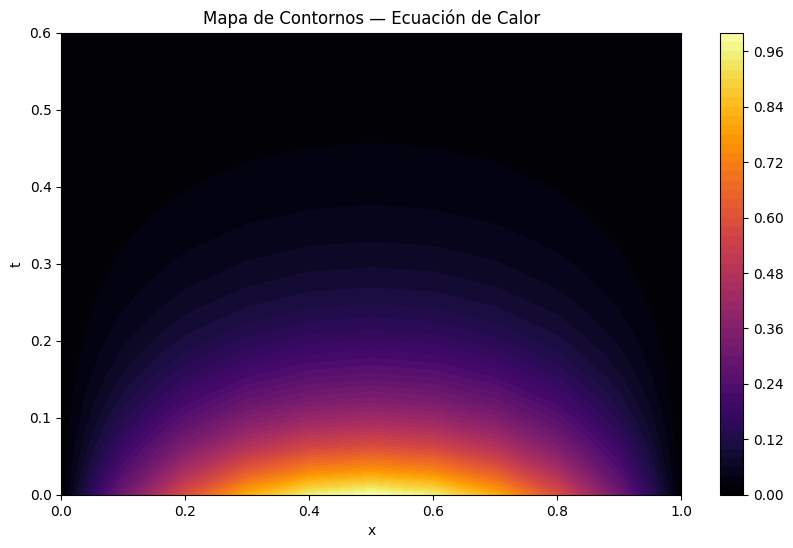

In [20]:
plt.figure(figsize=(10,6))
X, T = np.meshgrid(x_full, tiempos)
plt.contourf(X, T, U, levels=50, cmap='inferno')
plt.title("Mapa de Contornos — Ecuación de Calor")
plt.xlabel("x")
plt.ylabel("t")
plt.colorbar()
plt.show()


Grafica: Superficie 3D

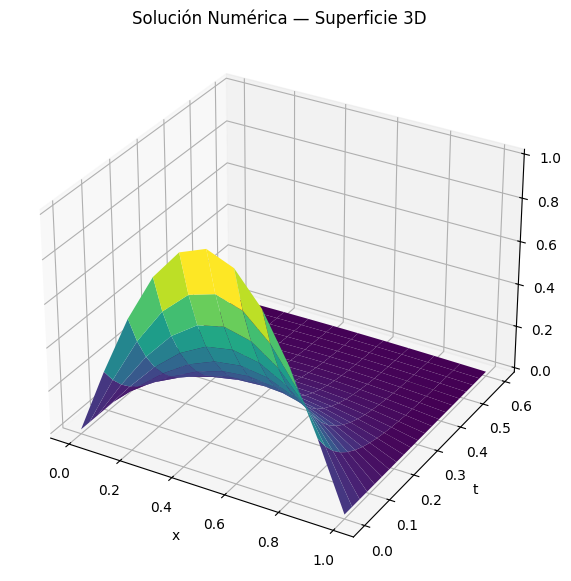

In [21]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U, cmap='viridis')
ax.set_title("Solución Numérica — Superficie 3D")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u")
plt.show()

EJERCICIO 4: Comparación solución exacta vs numérica

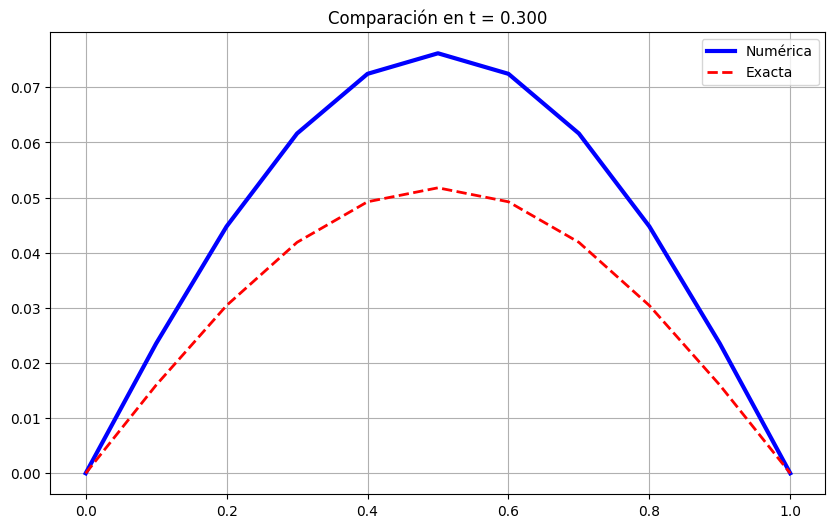

In [22]:
def exacta(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

idx = j//2
t_eval = tiempos[idx]

u_exact = exacta(x_full, t_eval)
u_num = U[idx]

plt.figure(figsize=(10,6))
plt.plot(x_full, u_num, "b-", lw=3, label="Numérica")
plt.plot(x_full, u_exact, "r--", lw=2, label="Exacta")
plt.legend()
plt.grid()
plt.title(f"Comparación en t = {t_eval:.3f}")
plt.show()

Grafica: Animacion

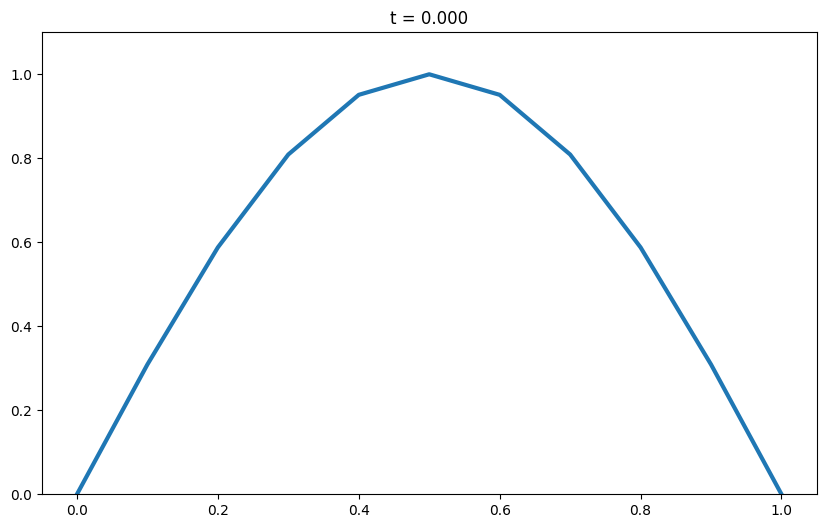

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
line, = ax.plot(x_full, U[0], lw=3)
ax.set_ylim(0, 1.1)
ax.set_title("Evolución temporal")

def update(i):
    line.set_ydata(U[i])
    ax.set_title(f"t = {tiempos[i]:.3f}")
    return line,

ani = FuncAnimation(fig, update, frames=j+1, interval=120, blit=True)
plt.show()

EJERCICIO 6: ¿Por qué hay imprecisión?

In [24]:
print("\n=== EJERCICIO 6 ===")
print("Imprecisión causada por:")
print("1. Muy pocos puntos espaciales n=9 .")
print("2. Pocos pasos temporales j=20.")
print("3. El método implícito suaviza la solución.")


=== EJERCICIO 6 ===
Imprecisión causada por:
1. Muy pocos puntos espaciales n=9 .
2. Pocos pasos temporales j=20.
3. El método implícito suaviza la solución.


OBSERVACIONES:

Algunas sintaxis usadas:
SLICING: Se uso para insertar la solucion interna en el vector completo

np.argmin(): se uso para encontrar el indice del tiempo mas cercano

MESHGRID: Para generar matrices en 2D

Por otro lado el BUCLE FOR para la construccion manual del vector lineal (Ejercicio 2)


Todo lo demas son terminos que ya hemos usado a lo largo del curso y del anterior.